In [10]:
import numpy as np 
import pandas as pd 
import seaborn as sns

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

Now let's drop any unuseful columns (Any columns that is not a feature in the car like car_ID )

In [4]:
df.drop("car_ID", axis=1, inplace=True)

Now check if there is any null values 

In [5]:
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Now let's import some usefull libraries 
- 1- matplotlib for visualizee the data 
- 2- sklearn make the work more easy you just can take an object from linear regression and split the data into train and test (you must know how to implement linear regression without this library)

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Now see what ts the best feature you can use with price by (correlation value)

In [7]:
corr=df.corr()
corr.style.background_gradient(cmap="inferno")

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


#### `enginesize` is the best but we can also try `curbweight` , `horsepower`OR we can use multi features and use them all

In [11]:
Cat_vars = []
Num_vars = []

for col in list(df.columns):
    
    if ((df[col].dtype == 'float64') | (df[col].dtype == 'int64')) & (df[col].nunique() > 10):
        
        Num_vars.append(col)
    
    else: Cat_vars.append(col)

#### Now we visualize all numeric valuees for all columns with price

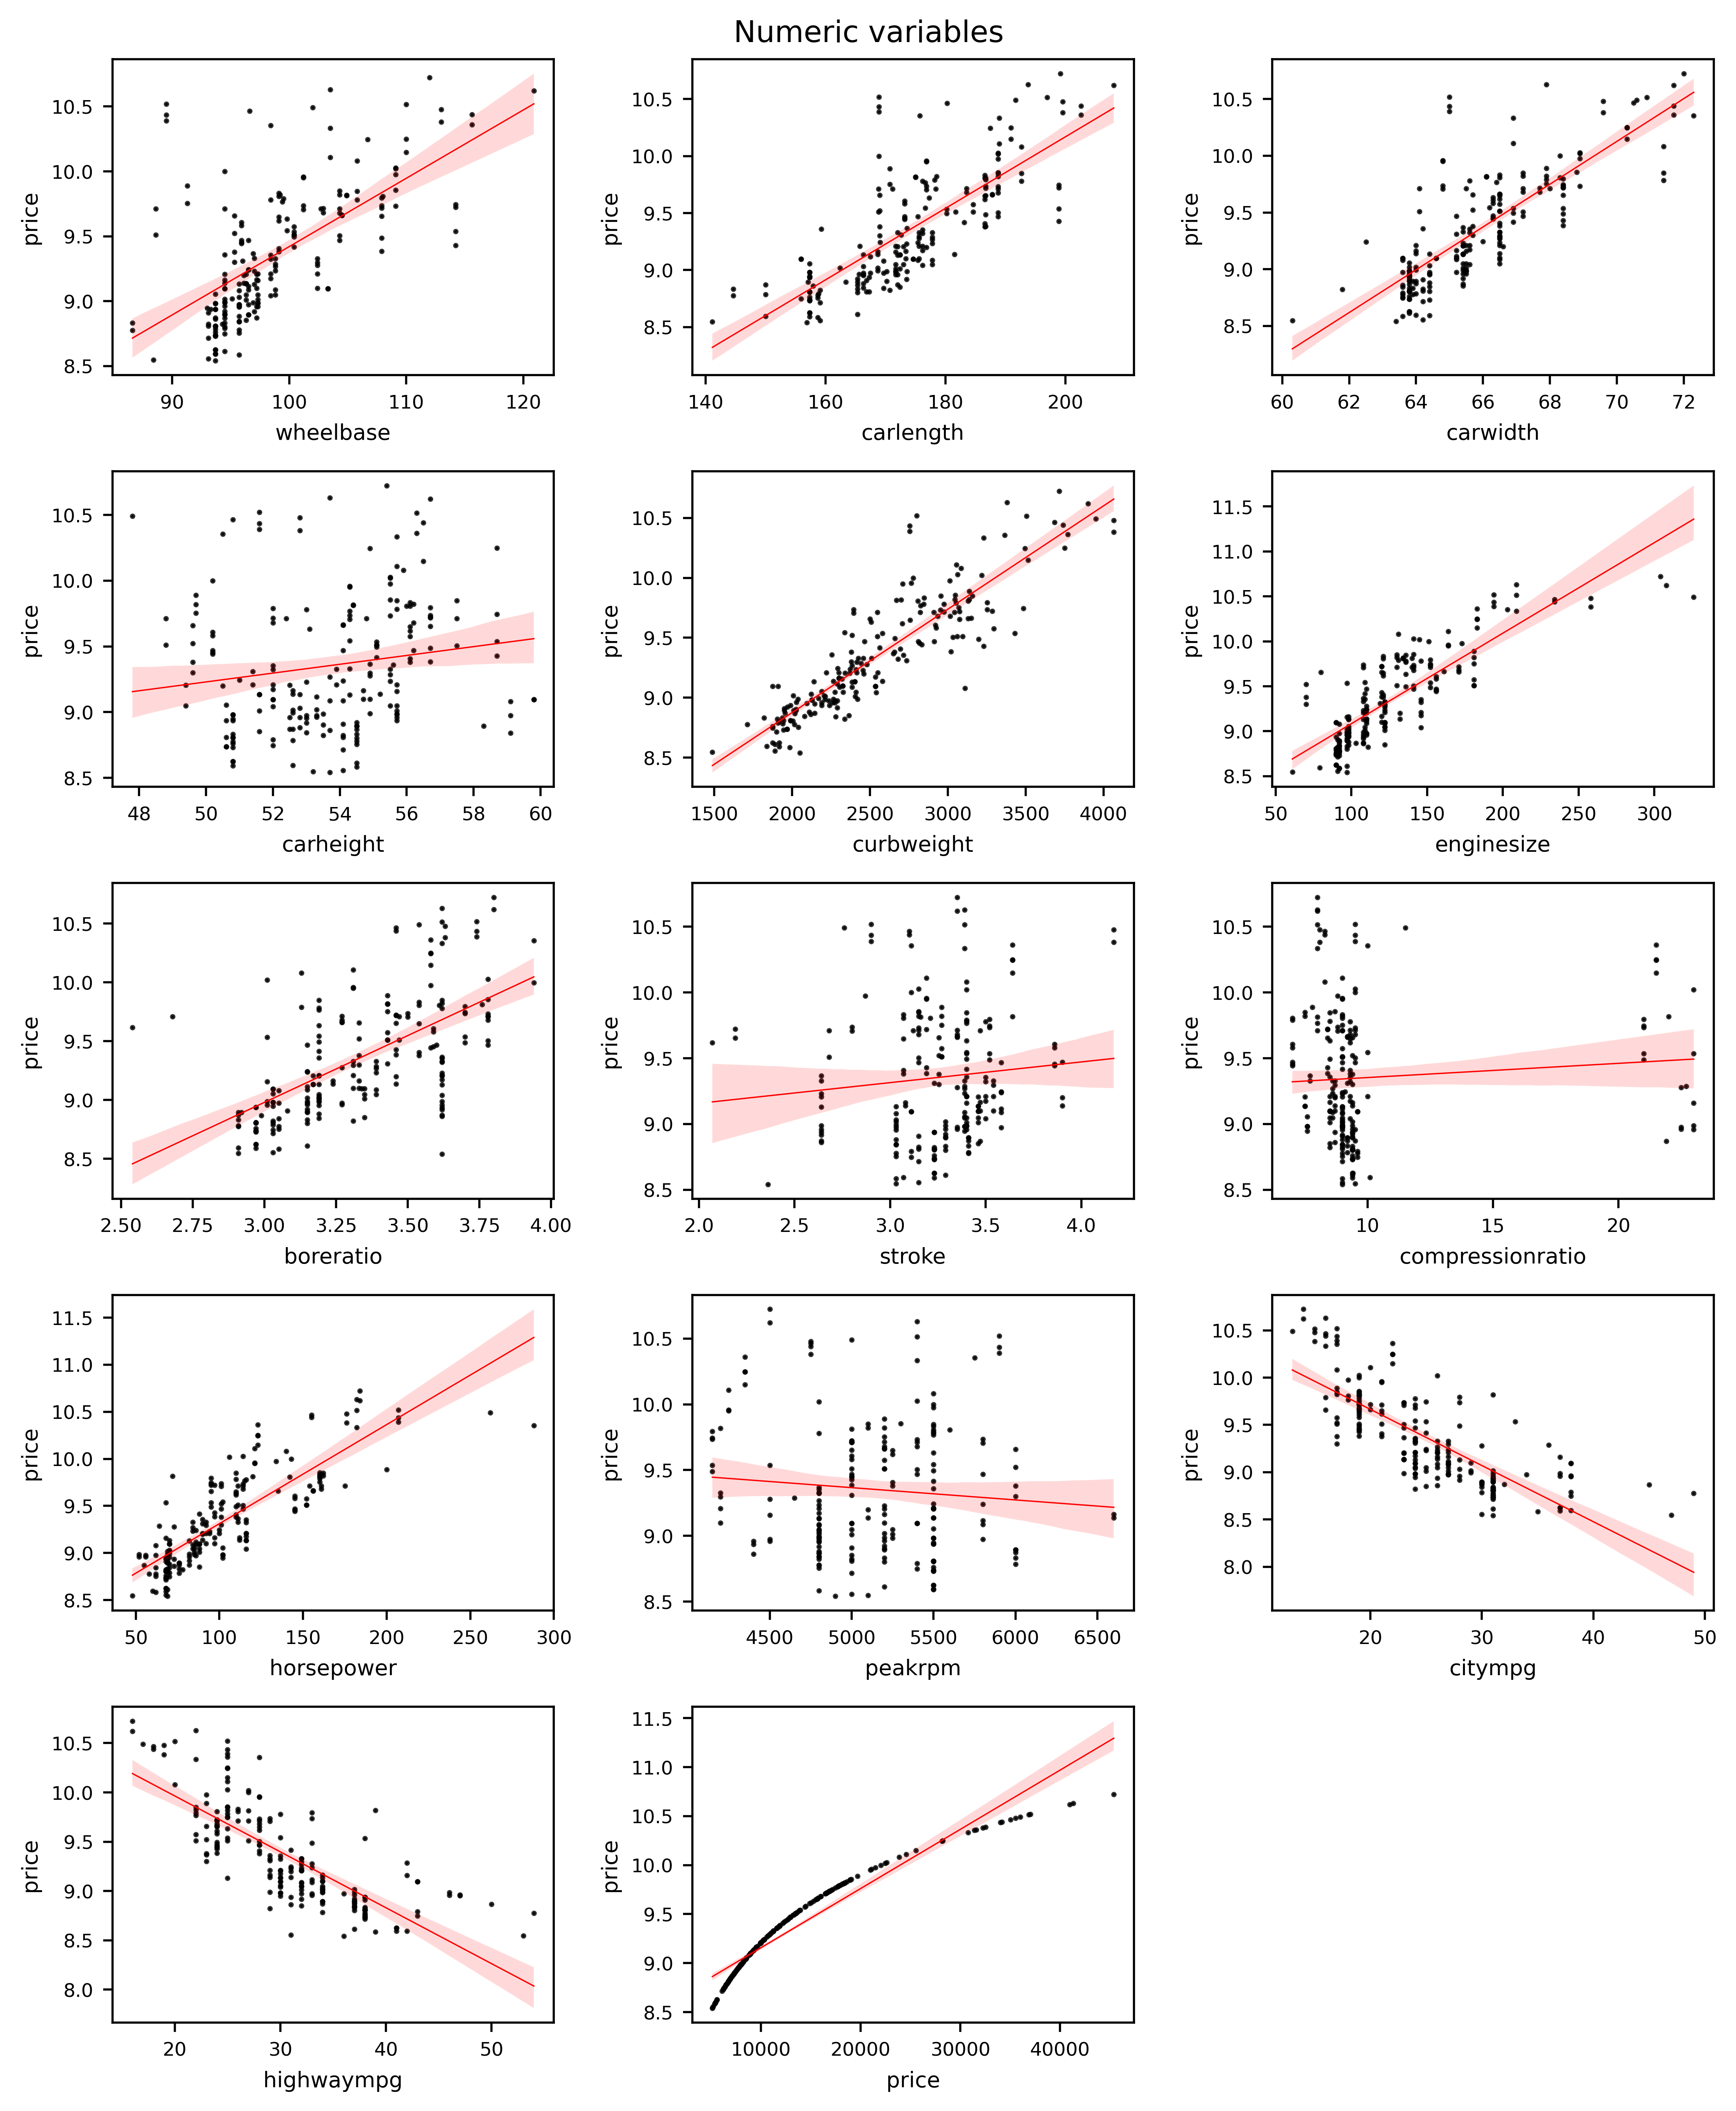

In [12]:
with plt.rc_context(rc = {'figure.dpi': 500, 'axes.labelsize': 8, 
                          'xtick.labelsize': 7, 'ytick.labelsize': 7}): 

    fig_1, ax_1 = plt.subplots(5, 3, figsize = (9, 11))

    for idx, (column, axes) in list(enumerate(zip(Num_vars, ax_1.flatten()))):
    
        sns.regplot(ax = axes, x = df[column], y = np.log(df['price']),
                    scatter_kws = {'s': 1, 'color': 'k'}, 
                    line_kws = {'lw': 0.5, 'color': 'r'})
    
    else:
    
        [axes.set_visible(False) for axes in ax_1.flatten()[idx + 1:]]

    fig_1.suptitle('Numeric variables', fontsize = 11)
    plt.tight_layout(pad = 1)
    plt.show()

In [13]:
y = df.price.values
y

array([13495.   , 16500.   , 16500.   , 13950.   , 17450.   , 15250.   ,
       17710.   , 18920.   , 23875.   , 17859.167, 16430.   , 16925.   ,
       20970.   , 21105.   , 24565.   , 30760.   , 41315.   , 36880.   ,
        5151.   ,  6295.   ,  6575.   ,  5572.   ,  6377.   ,  7957.   ,
        6229.   ,  6692.   ,  7609.   ,  8558.   ,  8921.   , 12964.   ,
        6479.   ,  6855.   ,  5399.   ,  6529.   ,  7129.   ,  7295.   ,
        7295.   ,  7895.   ,  9095.   ,  8845.   , 10295.   , 12945.   ,
       10345.   ,  6785.   ,  8916.5  ,  8916.5  , 11048.   , 32250.   ,
       35550.   , 36000.   ,  5195.   ,  6095.   ,  6795.   ,  6695.   ,
        7395.   , 10945.   , 11845.   , 13645.   , 15645.   ,  8845.   ,
        8495.   , 10595.   , 10245.   , 10795.   , 11245.   , 18280.   ,
       18344.   , 25552.   , 28248.   , 28176.   , 31600.   , 34184.   ,
       35056.   , 40960.   , 45400.   , 16503.   ,  5389.   ,  6189.   ,
        6669.   ,  7689.   ,  9959.   ,  8499.   , 

In [14]:
# Make the values in 1D array
y = y.reshape(-1, 1)
y

array([[13495.   ],
       [16500.   ],
       [16500.   ],
       [13950.   ],
       [17450.   ],
       [15250.   ],
       [17710.   ],
       [18920.   ],
       [23875.   ],
       [17859.167],
       [16430.   ],
       [16925.   ],
       [20970.   ],
       [21105.   ],
       [24565.   ],
       [30760.   ],
       [41315.   ],
       [36880.   ],
       [ 5151.   ],
       [ 6295.   ],
       [ 6575.   ],
       [ 5572.   ],
       [ 6377.   ],
       [ 7957.   ],
       [ 6229.   ],
       [ 6692.   ],
       [ 7609.   ],
       [ 8558.   ],
       [ 8921.   ],
       [12964.   ],
       [ 6479.   ],
       [ 6855.   ],
       [ 5399.   ],
       [ 6529.   ],
       [ 7129.   ],
       [ 7295.   ],
       [ 7295.   ],
       [ 7895.   ],
       [ 9095.   ],
       [ 8845.   ],
       [10295.   ],
       [12945.   ],
       [10345.   ],
       [ 6785.   ],
       [ 8916.5  ],
       [ 8916.5  ],
       [11048.   ],
       [32250.   ],
       [35550.   ],
       [36000.   ],


In [15]:
# Make x , y in the same dimention 
X = df.horsepower.values
X = X.reshape(-1, 1)
y = df.price.values
y = y.reshape(-1, 1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

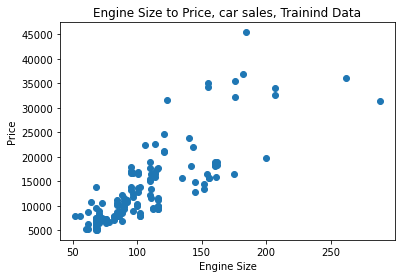

In [17]:
plt.scatter(X_train, y_train)

plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Engine Size to Price, car sales, Trainind Data')

plt.show()

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

In [19]:
print(f'Training Acc {round(lr.score(X_train, y_train) * 100, 2)}%')
print(f'Testing Acc {round(lr.score(X_test, y_test) * 100, 2)}%')

Training Acc 65.8%
Testing Acc 63.93%


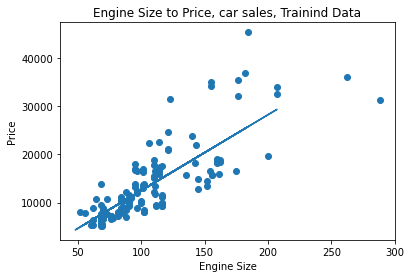

In [20]:
plt.scatter(X_train, y_train)
plt.plot(X_test, yhat)

plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Engine Size to Price, car sales, Trainind Data')

plt.show()

#### Lets try another column

In [21]:
# Make x , y in the same dimention 
X = df.enginesize.values
X = X.reshape(-1, 1)
y = df.price.values
y = y.reshape(-1, 1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

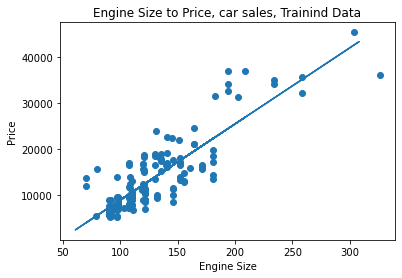

In [24]:
plt.scatter(X_train, y_train)
plt.plot(X_test, yhat)

plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Engine Size to Price, car sales, Trainind Data')

plt.show()

### As we see in correlation map this is the better column 

In [25]:
print(f'Training Acc {round(lr.score(X_train, y_train) * 100, 2)}%')
print(f'Testing Acc {round(lr.score(X_test, y_test) * 100, 2)}%')

Training Acc 75.07%
Testing Acc 80.41%


#### Let's try another a bad correlation column 

In [26]:
# Make x , y in the same dimention 
X = df.carheight.values
X = X.reshape(-1, 1)
y = df.price.values
y = y.reshape(-1, 1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

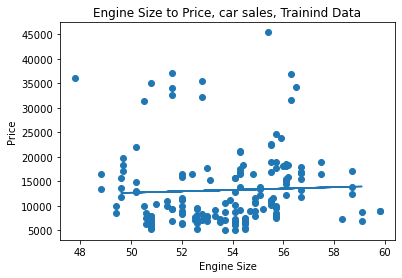

In [29]:
plt.scatter(X_train, y_train)
plt.plot(X_test, yhat)

plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Engine Size to Price, car sales, Trainind Data')

plt.show()

In [30]:
print(f'Training Acc {round(lr.score(X_train, y_train) * 100, 2)}%')
print(f'Testing Acc {round(lr.score(X_test, y_test) * 100, 2)}%')

Training Acc 0.2%
Testing Acc 2.67%
